In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Discrete Uniform distribution
each outcome has an equal probability of occurance

each side of a dice has the same probability of being rolled, uniform and discrete

each side is 1/m or 1/6 for dice

## Problem statement

The number of books sold by a bookseller per day is given in 'bookseller.csv'.

Let

X = Number of books sold by a bookseller per day

X is a Discrete Random variable (because it represents the book count). Let's see the distribution of X and answer the below questions.


1. Find the probability that more than (or equal to) 96 books will be sold on a given day
2. Find the probability that less than (or equal to) 92 books will be sold on a given day

In [3]:
 book_count = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Business Statistics Course/Week 1 Inferential Stats intro/Uniform Distribution/bookseller.csv')
book_count.head()

,S.No,Date,Number of Books Sold
0,1,01-01-2020,90
1,2,02-01-2020,100
2,3,03-01-2020,100
3,4,04-01-2020,97
4,5,05-01-2020,93


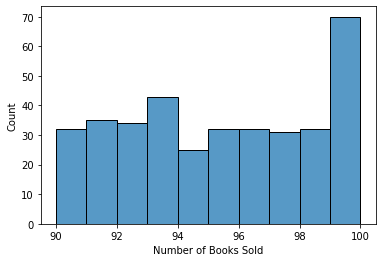

In [4]:
sns.histplot(data=book_count, x='Number of Books Sold')

Text(0.5, 1.0, 'Data Distribution')

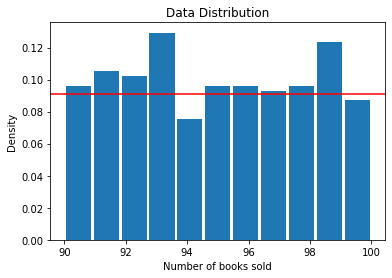

In [39]:
plt.hist(book_count['Number of Books Sold'], 11, rwidth=0.9, density =True)
plt.axhline(1/11, color='red') #1/11 is the probability, there are 11 numbers from 90 to 100
plt.xlabel('Number of books sold')
plt.ylabel('Density')
plt.title('Data Distribution')
# all 11 numbers have an equal, uniform probability so we use 1/11 as the axh line
# x axis shows the range of books sold is 90 to 100, evenly distributed with slight random varability

The visual evidence shows it is roughly uniformly distributed from 90 to 100, will assume uniform distribution for the poplation

X ~ U(90,100)

Find the probability that of selling at least 96 books

P(X>=96)

In [25]:
# import the required function
from scipy.stats import uniform
# use uniform.pdf() to generate probability distribution
k = np.arange(90, 101)
probs = uniform.pdf(k, loc=90, scale=11)
# uniform distribution from 90 to 100
# loc is start, 90, scale is 11 steps above, 90 to 100 is 11 steps, inclusve of 90 and 100

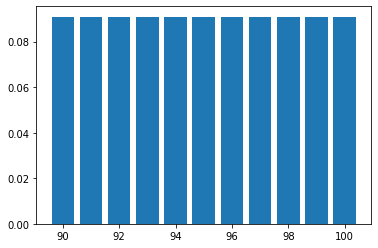

In [26]:
# plot it to see what the discrete uniform distribution looks like with each of the 11 numbers, 90-100
# we don't have to visualize, we can skip this and just use the function, but lets take a look, anyway
bar1 = plt.bar(k, probs)


Each has an equal probability of 1/11

we're looking for P(X>=96), so lets color the bars 96 and up to visualize

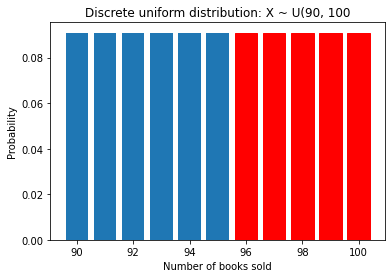

In [29]:
bar1 = plt.bar(k, probs)

for i in range(6,11):
  bar1[i].set_color('r')
plt.xlabel('Number of books sold')
plt.ylabel('Probability')
plt.title('Discrete uniform distribution: X ~ U(90, 100')
plt.show()

The just allows us to visualize, not required.

In the above graph, the red region represents P(X>=96)

Let's calculate the probability that more than 96 books will be sold.  we wil luse uniform.cdf() for this

In [30]:
1 - uniform.cdf(96, loc=90, scale=11)
# cumulative distribution for uniform dist from 90 to 11 steps above, or 90 to 100
# there are 11 possibilities, we are calculating 5/11 or 5 of the 11 possibilities
# P(X>=96) is 96, 97, 98, 99, or 100

0.4545454545454546

In [31]:
5/11

0.45454545454545453

P(X<=92)

probability we sell 92 or less books

Text(0.5, 1.0, 'Discrete Uniform Distributuion: x ~ U(90, 100')

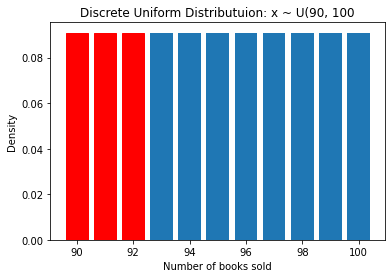

In [35]:
# we could vizualize if we want
bar2 = plt.bar(k, probs)

for i in range(0, 3):
  bar2[i].set_color('r')
plt.xlabel('Number of books sold')
plt.ylabel('Density')
plt.title('Discrete Uniform Distributuion: x ~ U(90, 100')


In [32]:
uniform.cdf(93, 90, 11)
#(left of 93, start at 90, go 11 steps higher to 100)

0.2727272727272727

In [36]:
# 90, 91, or 92 books sold is 3 out of 11
3/11

0.2727272727272727

### Conclusion
There is a 45% chance that 96 or more books will be sold on a given day

There is a 27% chance that 92 or less books will be sold on a given day

# Continuous Uniform Distribution

### Problem statement


 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs


X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time, (median time)


In [40]:
debug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Business Statistics Course/Week 1 Inferential Stats intro/Uniform Distribution/debugging.csv')
debug.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


This is continous numerical data

Let's check and see if the distribution is uniform

Text(0.5, 1.0, 'Data Distribution')

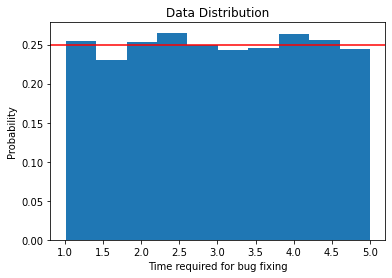

In [44]:
# visualize the sample data with a histogram
plt.hist(debug['Time Taken to fix the bug'], density=True)
plt.axhline(1/4, color='red')
plt.xlabel('Time required for bug fixing')
plt.ylabel('Probability')
plt.title('Data Distribution')

The bars are not clearly seperated because it is continuous data, not discrete

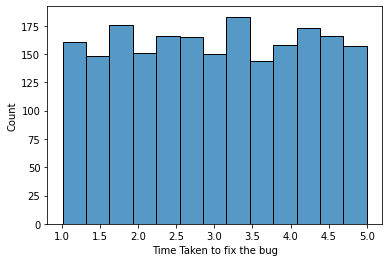

In [42]:
# alternatively use seaborn histplot 
sns.histplot(data=debug, x='Time Taken to fix the bug')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


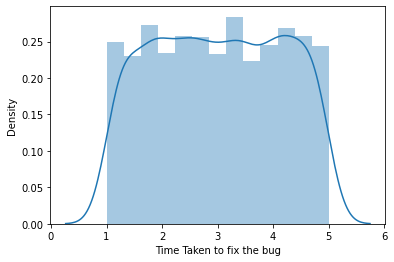

In [46]:
# alternativly, can use seaborn distplot
sns.distplot(debug['Time Taken to fix the bug'])

Let the data tell us what type of distribution

We can presume this is uniform, density is flat on top

Uniform distribution between 1 and 5 hours

X ~ U(1, 5)

In [47]:
# import the required function
from scipy.stats import uniform

# use the uniform.pdf() function to generate probability distribution
x = np.linspace(1, 5, 50) # continuous needs linspace, here we use the default 50 points
# note, linspace is inclusive of the stop point
probs = uniform.pdf(x, loc=1, scale=4)
# loc=1 is the start, scale=4 is 4 steps up from the start, so 1 through 5

Use uniform.cdf() to find prob to left or right of whatever point we need

What is the probability a randomly selected variable will be less than 3 hours

Text(0.5, 1.0, 'Continuous Uniform Distribution: X ~ U(1,5')

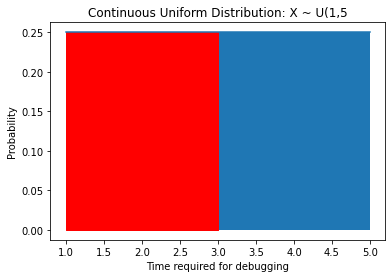

In [48]:
# plot to visualize
# not required, we can just run the calculation

x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color='r')
plt.xlabel('Time required for debugging')
plt.ylabel('Probability')
plt.title('Continuous Uniform Distribution: X ~ U(1,5')

In [49]:
uniform.cdf(x=3, loc=1, scale=4)

0.5

Find the probability of taken more than 2 hours


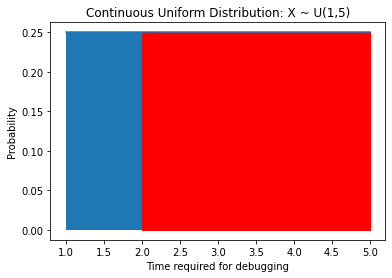

In [53]:
# visualize, not required but helpful
x2 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x2, uniform.pdf(x=x2, loc=1, scale=4), color='r')
plt.xlabel('Time required for debugging')
plt.ylabel('Probability')
plt.title('Continuous Uniform Distribution: X ~ U(1,5)')
plt.show()


In [54]:
# find probability longer than 2 hours, P(X<2)
1-uniform.cdf(x=2, loc=1, scale=4)

0.75

###What is the median or 50th percentile?

ppf() is used to calculate percentile given probability, opposite of cdf()

In [55]:
uniform.ppf(q=0.5, loc=1, scale=4)

3.0

In [57]:
# what is the 25th percentile?
uniform.ppf(q=0.25, loc=1, scale=4)

2.0

In [58]:
1-uniform.cdf(4.2, loc=1, scale=4)

0.19999999999999996